In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data as a pandas dataframe.
df_full = pd.read_csv('rideshare_kaggle.csv')

## Feature Engineering

In this section, we create new features to enhance our dataset. Specifically, we will:

- **`is_weekend`**: A binary variable indicating whether the ride occurred on a weekend. This feature is derived from the `datetime` column by checking if the date falls on one of the specified weekend days.
- **`is_rush_hour`**: A binary variable indicating whether the ride occurred during rush hour. This feature is determined by checking if the time of the ride falls within the defined rush hour periods (8-10 AM and 4-6 PM).

These features will help us better analyze and model the data by capturing temporal patterns in the rideshare activity.

In [59]:
#Adding a categorical weekend columns

# Define the weekend dates for range of data
weekend_dates = {'2018-12-01', '2018-12-02', '2018-12-08', '2018-12-09', '2018-12-15', '2018-12-16'}

# Create the weekend indicator column and add it to the data frame
df_full['is_weekend'] = df_full['datetime'].dt.date.astype(str).isin(weekend_dates).astype(int)



In [67]:
#Adding a categorical rush hour column

# Extract hour from the datetime column
df_full['hour'] = df_full['datetime'].dt.hour

# Create the rush hour indicator column
df_full['is_rush_hour'] = df_full['hour'].apply(lambda x: 1 if (8 <= x < 10) or (16 <= x < 18) else 0)


In [75]:
# Filter the df to only include rows where the 'name' column is 'UberX'
df_UberX = df_full[df_full['name'] == 'UberX']

In [77]:
## Generate training data

# Shuffle the dataframe
df_UberX = df_UberX.sample(frac=1, random_state=123)

# Calculate the sizes of validation and test sets
val_size = int(len(df_UberX) * 0.2)
test_size = int(len(df_UberX) * 0.1)

# Select rows based on the val_size and test_size to store as train set, val set, and test set
train_df = df_UberX.iloc[val_size + test_size:]
val_df = df_UberX.iloc[:val_size]
test_df = df_UberX.iloc[val_size:val_size + test_size]




In [79]:
# Review the first 5 rows of the training data. 
train_df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,is_weekend,is_rush_hour
510728,43ead41d-0008-4f03-9cdb-097e99f14486,1.543802e+09,1,3,12,2018-12-03 01:48:00,America/New_York,Financial District,South Station,Uber,...,36.60,1543726800,50.99,1543788000,35.85,1543748400,50.32,1543788000,0,0
578628,72e36153-df00-4790-92a7-4748a9d96d31,1.543413e+09,13,28,11,2018-11-28 13:56:07,America/New_York,Beacon Hill,Boston University,Uber,...,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,0,0
76158,31ca9f85-bdcc-4bb5-9735-2c14766987f6,1.544776e+09,8,14,12,2018-12-14 08:20:06,America/New_York,Northeastern University,West End,Uber,...,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1544817600,0,1
249587,5c46d7a7-372d-49af-a040-8ca1b6bb003c,1.545025e+09,5,17,12,2018-12-17 05:40:07,America/New_York,Financial District,South Station,Uber,...,34.07,1545044400,41.42,1545076800,28.11,1545044400,35.95,1545076800,0,0
253866,9afd18eb-ecef-498d-ab78-d38dfb06eada,1.544845e+09,3,15,12,2018-12-15 03:35:05,America/New_York,Fenway,North Station,Uber,...,27.21,1544781600,46.63,1544814000,24.55,1544785200,43.84,1544817600,1,0


In [9]:
# Review the size of the training data. 
print(f'Number of observations: {train_df.shape[0]}')
print(f'Number of columns: {train_df.shape[1]}')

Number of observations: 38567
Number of columns: 57


#### **Data Description:**

**Y variable**: price

**Predictor variables**: ID, timestamp, hour, day, month, timezone, source, destination, cab type, distance, surge pricing indicator, and several weather conditions including temperature, weather summary, precipitation, humidity, wind speed, visibility, high and low temperatures, pressure, UV Index, sunrise and sunset times, is_weekend, is_rush_hour. 


In [11]:
#### Check for missing values:

train_df.isnull().sum()


id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [84]:
#### Check summary statistics:

summary_stats = train_df.describe()
summary_stats

,timestamp,hour,day,month,datetime,price,distance,surge_multiplier,latitude,longitude,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,is_weekend,is_rush_hour
count,3.856700e+04,38567.000000,38567.000000,38567.000000,38567,38567.000000,38567.000000,38567.0,38567.000000,38567.000000,...,38567.000000,3.856700e+04,38567.000000,3.856700e+04,38567.000000,3.856700e+04,38567.000000,3.856700e+04,38567.000000,38567.000000
mean,1.544048e+09,11.535847,17.767184,11.588742,2018-12-05 22:19:47.210438912,9.770062,2.198911,1.0,42.338243,-71.066064,...,33.435208,1.544044e+09,45.234340,1.544050e+09,29.690229,1.544051e+09,41.964895,1.544051e+09,0.263023,0.164649
min,1.543204e+09,0.000000,1.000000,11.000000,2018-11-26 03:40:46,6.000000,0.020000,1.0,42.214800,-71.105400,...,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09,0.000000,0.000000
25%,1.543445e+09,6.000000,13.000000,11.000000,2018-11-28 22:50:07,8.000000,1.300000,1.0,42.350300,-71.081000,...,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09,0.000000,0.000000
50%,1.543738e+09,12.000000,17.000000,12.000000,2018-12-02 08:13:03,9.500000,2.170000,1.0,42.351900,-71.063100,...,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09,0.000000,0.000000
75%,1.544830e+09,17.000000,28.000000,12.000000,2018-12-14 23:30:11.500000,10.500000,2.860000,1.0,42.364700,-71.054200,...,38.880000,1.544789e+09,46.910000,1.544814e+09,35.330000,1.544789e+09,44.120000,1.544818e+09,1.000000,0.000000
max,1.545161e+09,23.000000,30.000000,12.000000,2018-12-18 19:15:10,44.000000,7.860000,1.0,42.366100,-71.033000,...,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09,1.000000,1.000000
std,6.901127e+05,6.931769,9.985999,0.492068,NaN,2.471197,1.183067,0.0,0.047786,0.020253,...,6.467204,6.910733e+05,5.643049,6.909396e+05,7.133120,6.879264e+05,6.932696,6.918583e+05,0.440280,0.370868


In [82]:
#### Determine which columns are categorical:

cat_col = [col for col in train_df.columns if train_df[col].dtype == 'object']
num_col = [col for col in train_df.columns if col not in cat_col]

print(f"cat_col = {len(cat_col)}\nnum_col = {len(num_col)}\n")

cat_col = 10
num_col = 49



#### Visualize Numerical Variables

In [86]:
# Remove 'id', the unique identifier from num_col. 
variables_to_exclude = ['id']
num_col = [col for col in num_col if col not in variables_to_exclude]

In [100]:
# Distinguish between continous and discrete numerical variables:
discrete_variables = ['hour','day','month','uvIndex']
continuous_variables = [col for col in num_col if col not in discrete_variables]

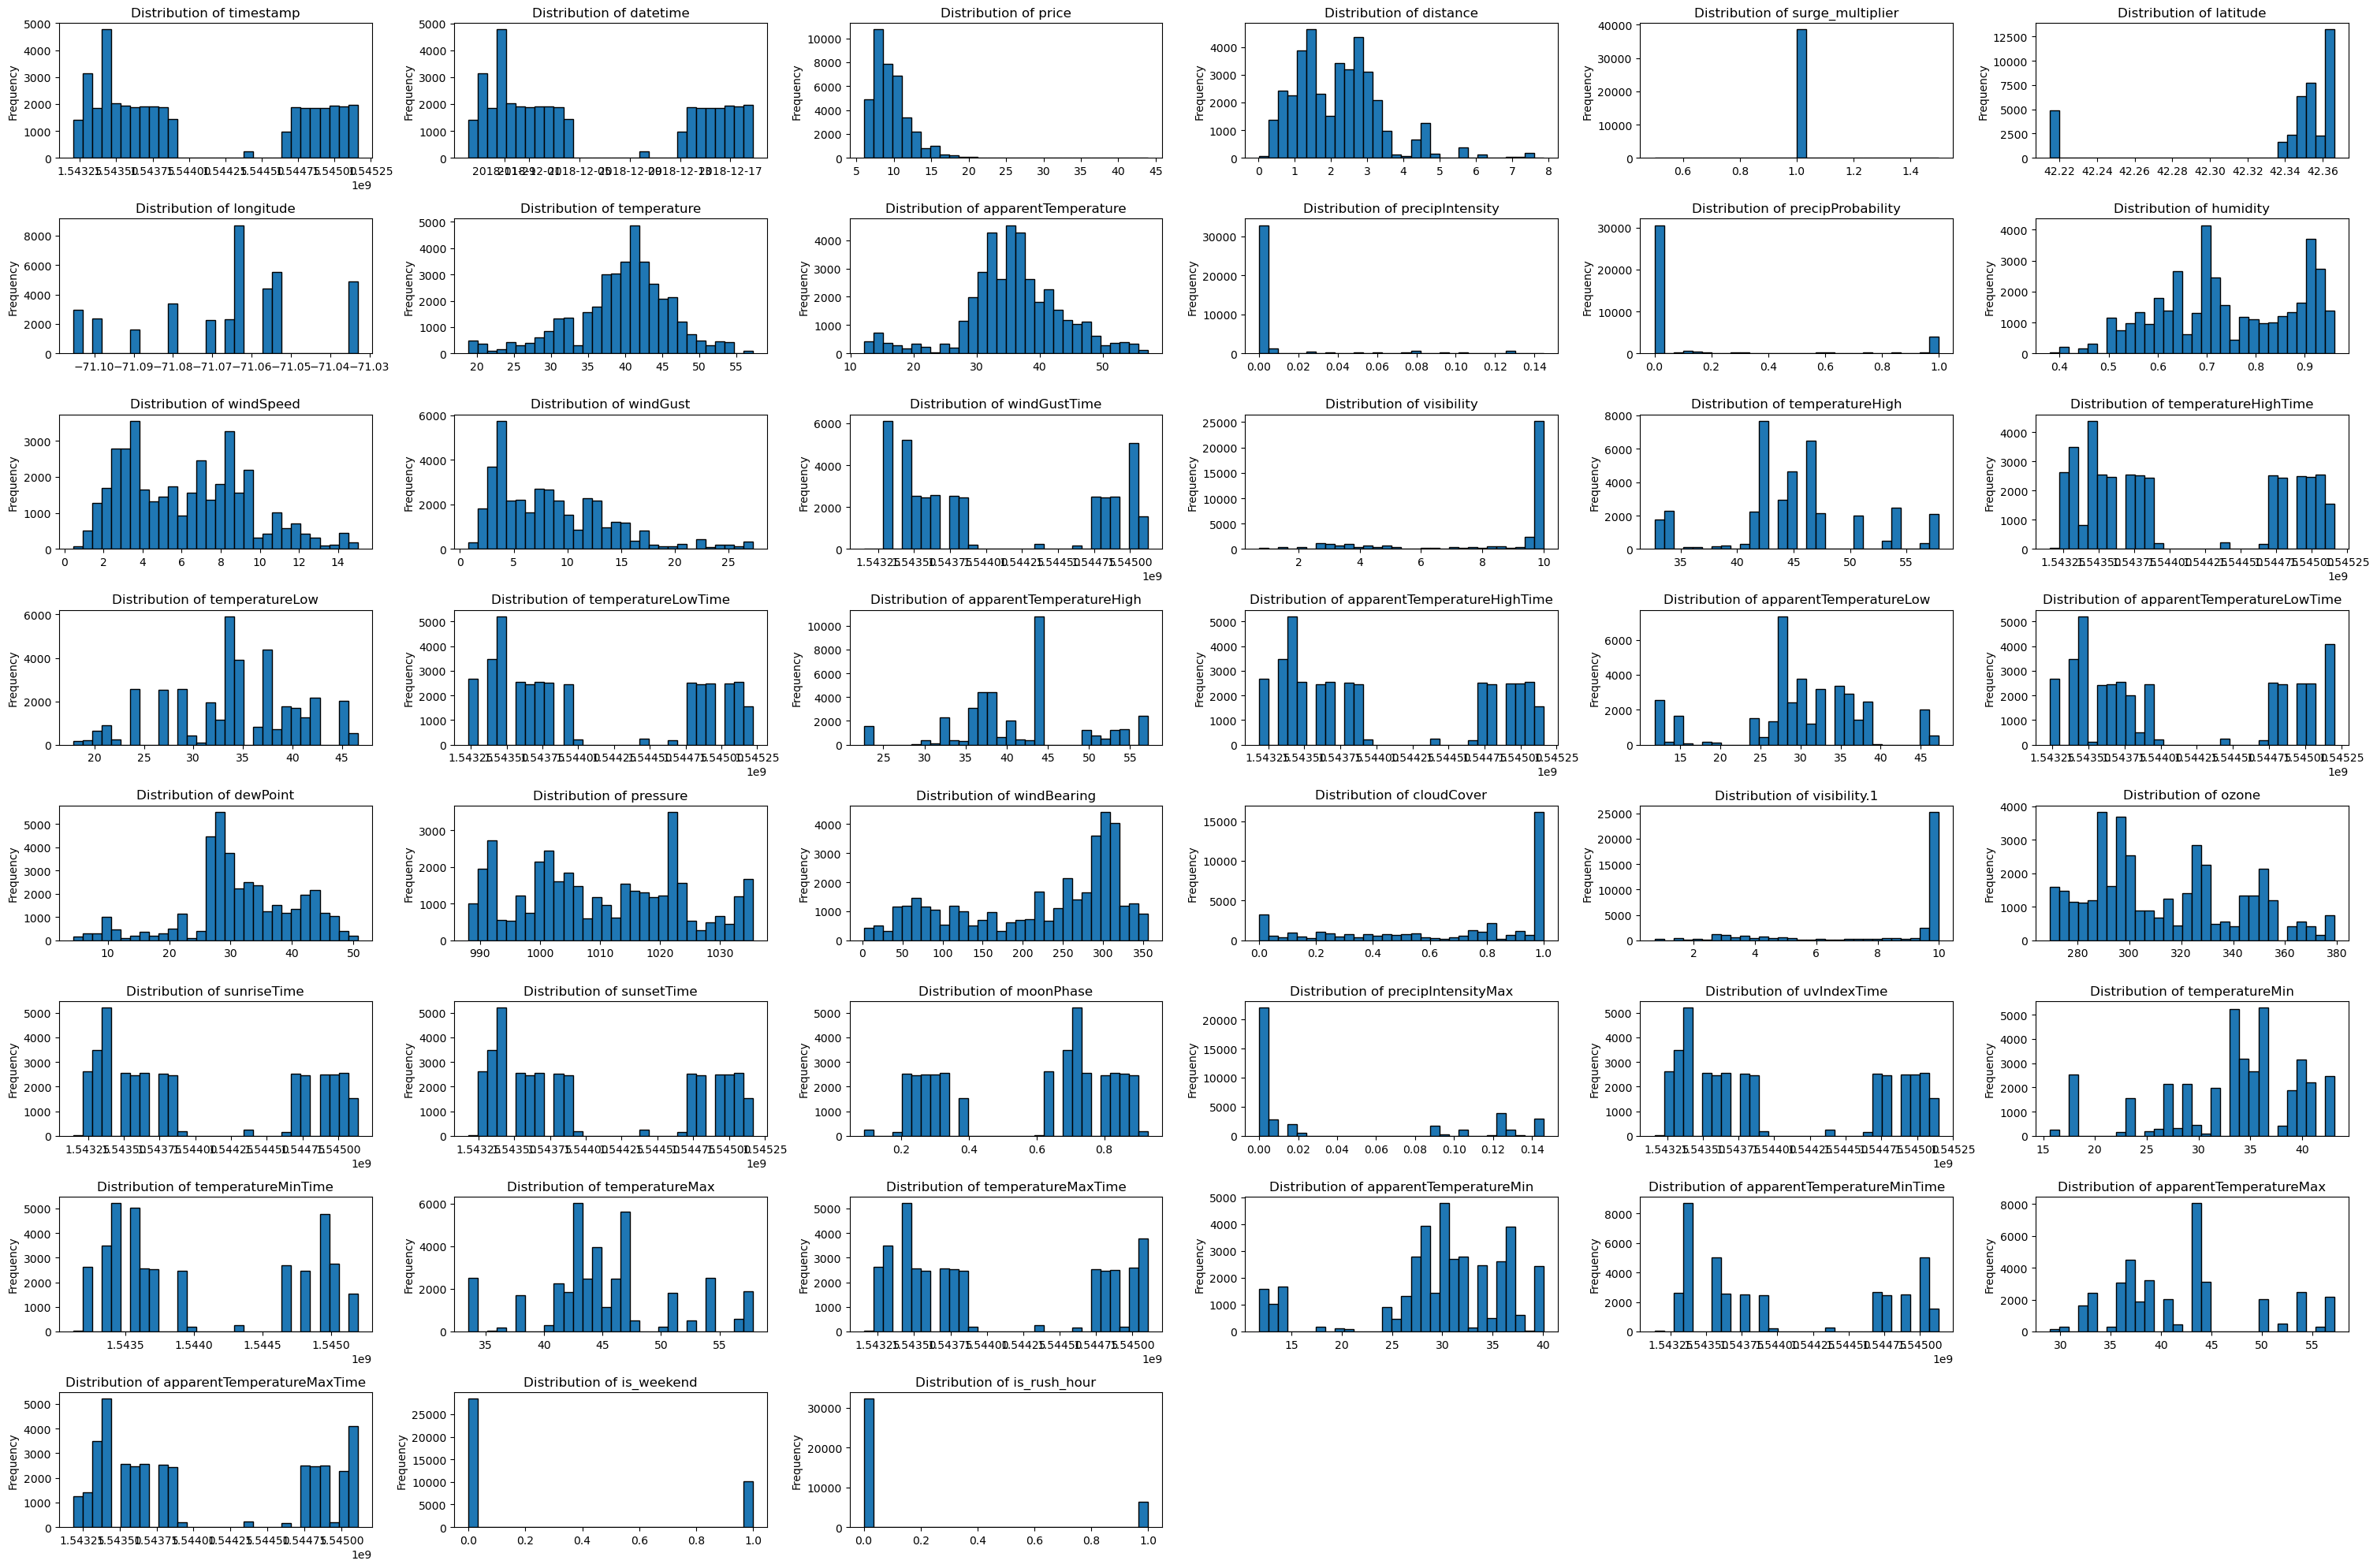

In [104]:
# Visualize Numerical Variables (continuous)
plt.figure(figsize=(30, 20))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(8, 6, i)
    plt.hist(train_df[col], bins=30, edgecolor='black')  # Plot histogram using matplotlib
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

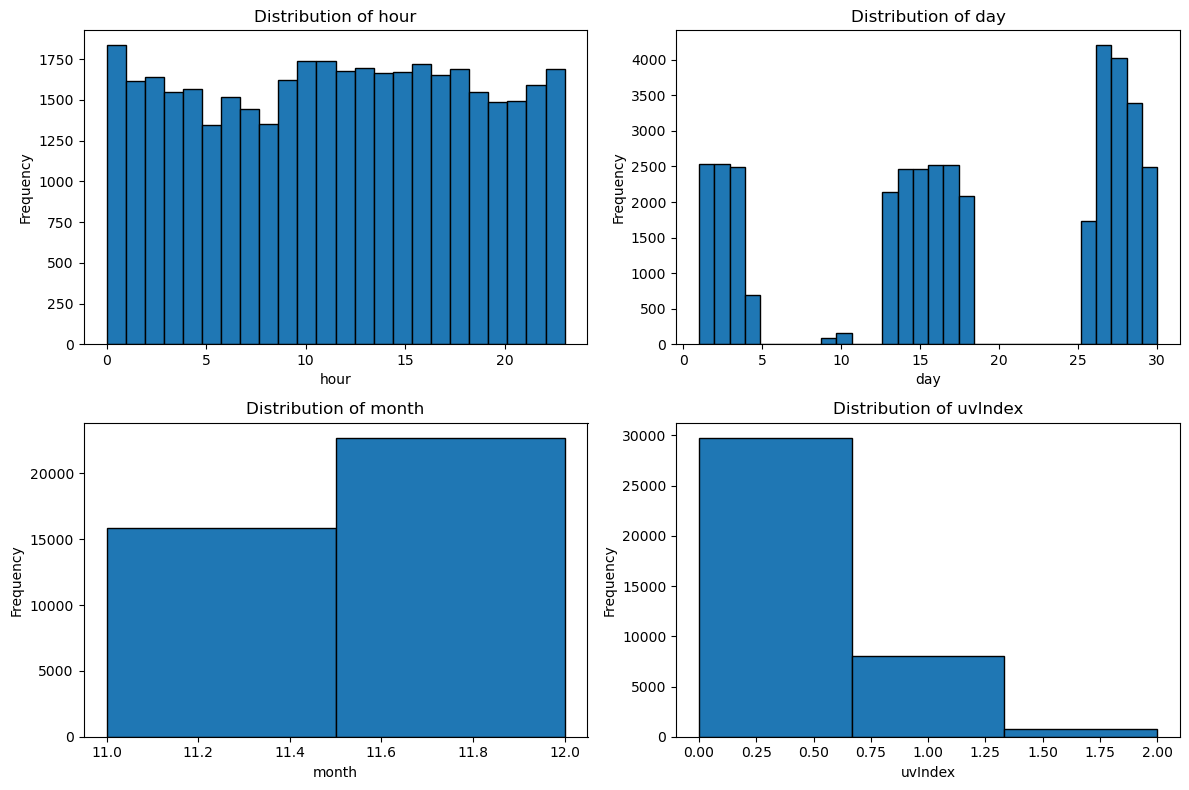

In [106]:
# Visualize Numerical Variables (discrete)
plt.figure(figsize=(12, 8))
for i, col in enumerate(discrete_variables, 1):
    plt.subplot(2, 2, i)
    plt.hist(train_df[col], bins=max(train_df[col]) - min(train_df[col]) + 1, edgecolor='black') 
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
    plt.xlabel(col)  
plt.tight_layout()
plt.show()

#### Visualize Categorical Variables

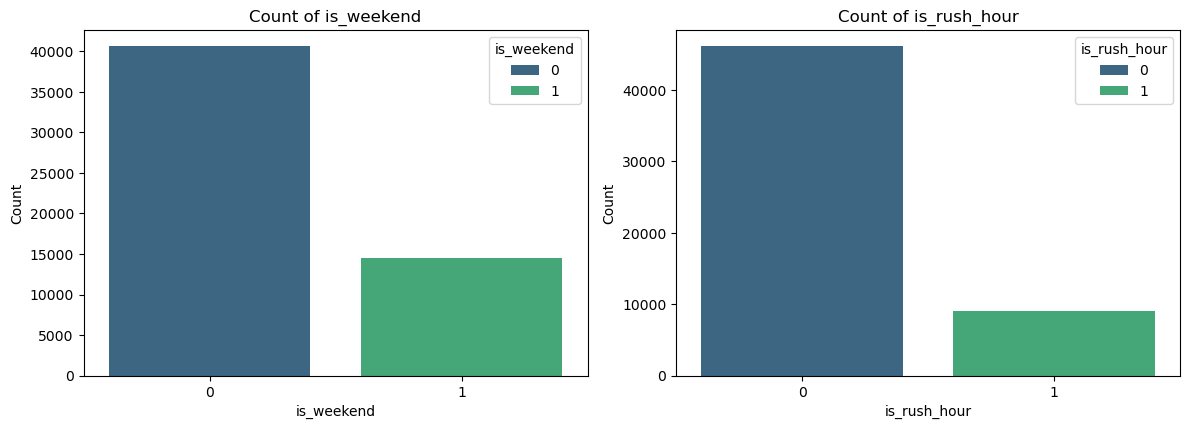

In [118]:
## Visualize Categorical Variables

# Define the list of categorical variables
categorical_variables = ['is_weekend', 'is_rush_hour']

# Create a figure for the subplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_variables, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df_UberX, x=col, palette='viridis', hue=col)  # Add hue parameter to suppress warning
    plt.title(f'Count of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title=col, loc='upper right')  # Add a legend to match hue usage
plt.tight_layout()
plt.show()

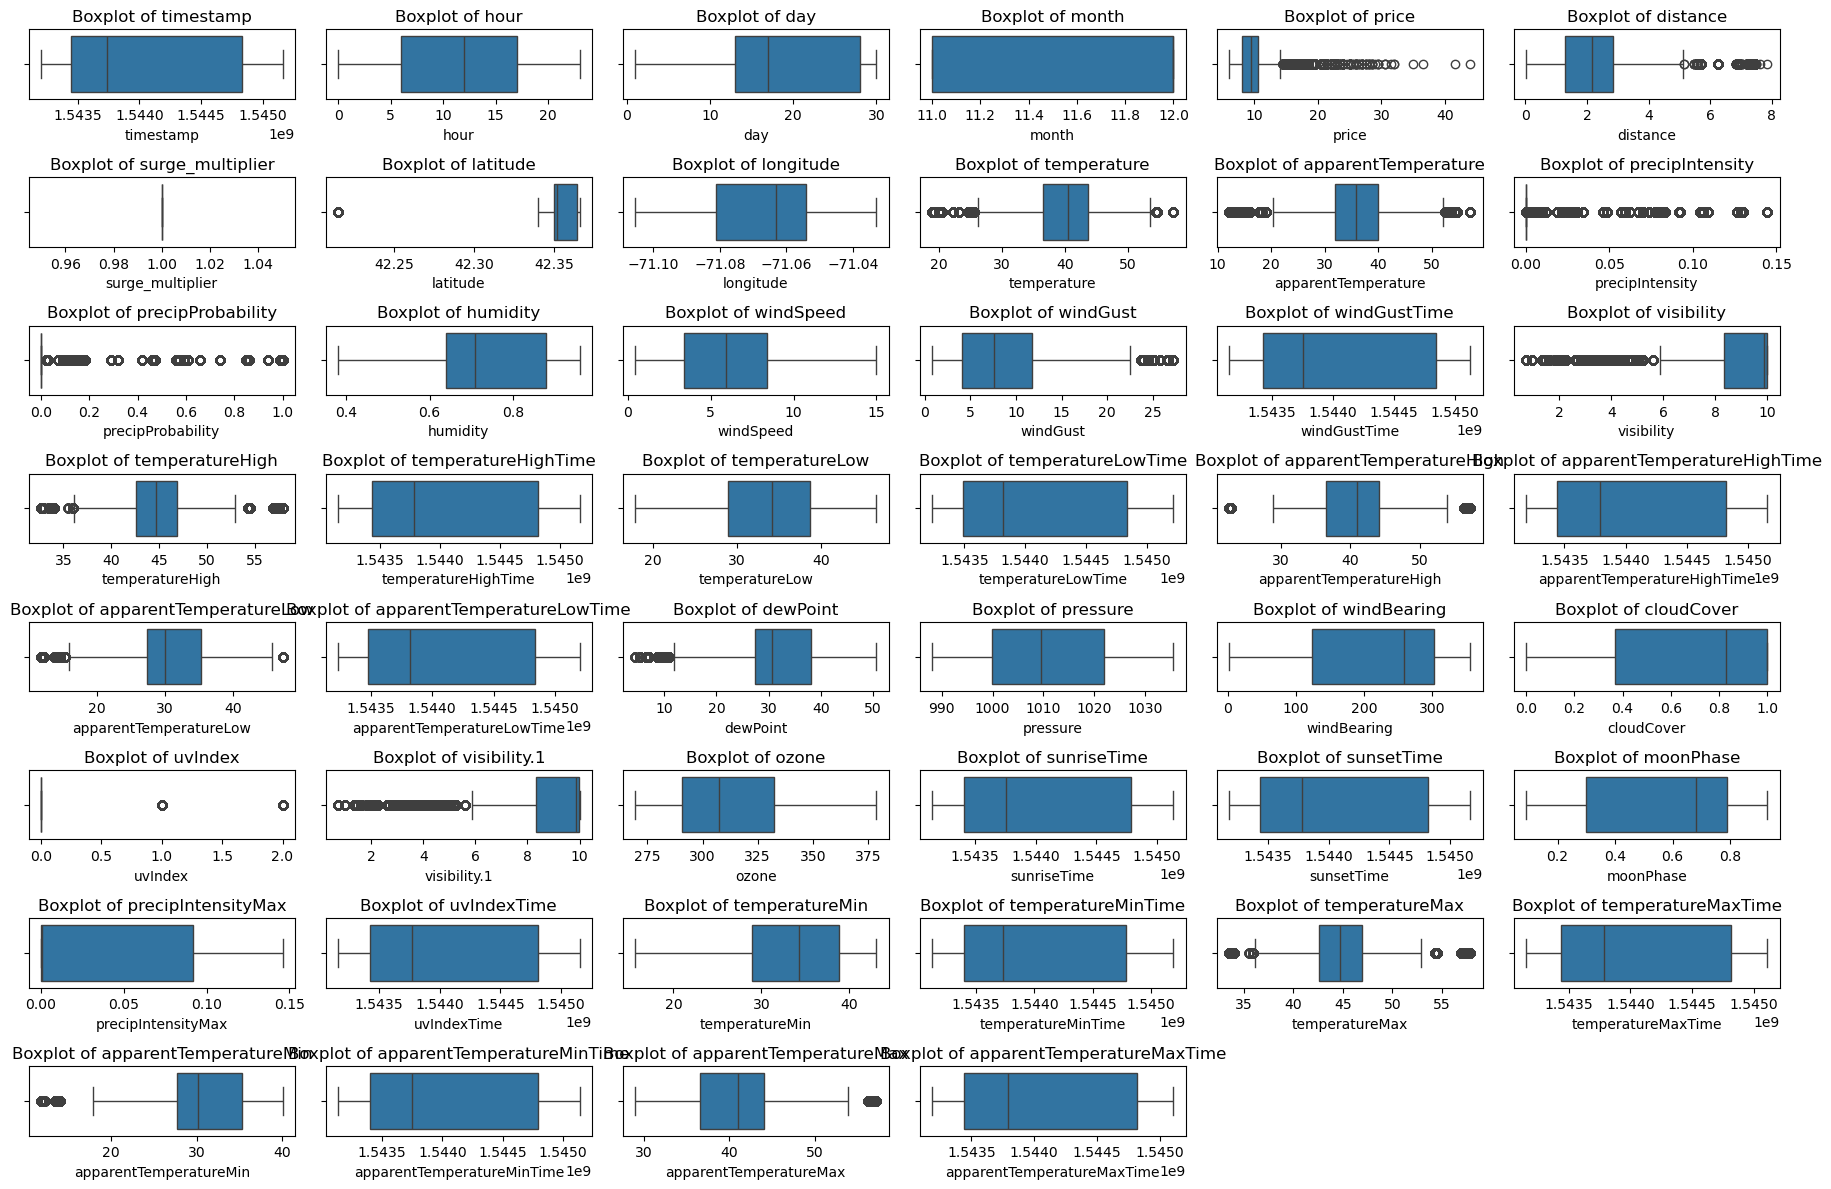

In [27]:
# Generate boxplots to detect outliers.
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_col, 1):
    plt.subplot(8, 6, i)
    sns.boxplot(x=df_UberX[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Correlation Analysis

In [120]:
### Numeric columns:
numeric_train_df = train_df[num_col]

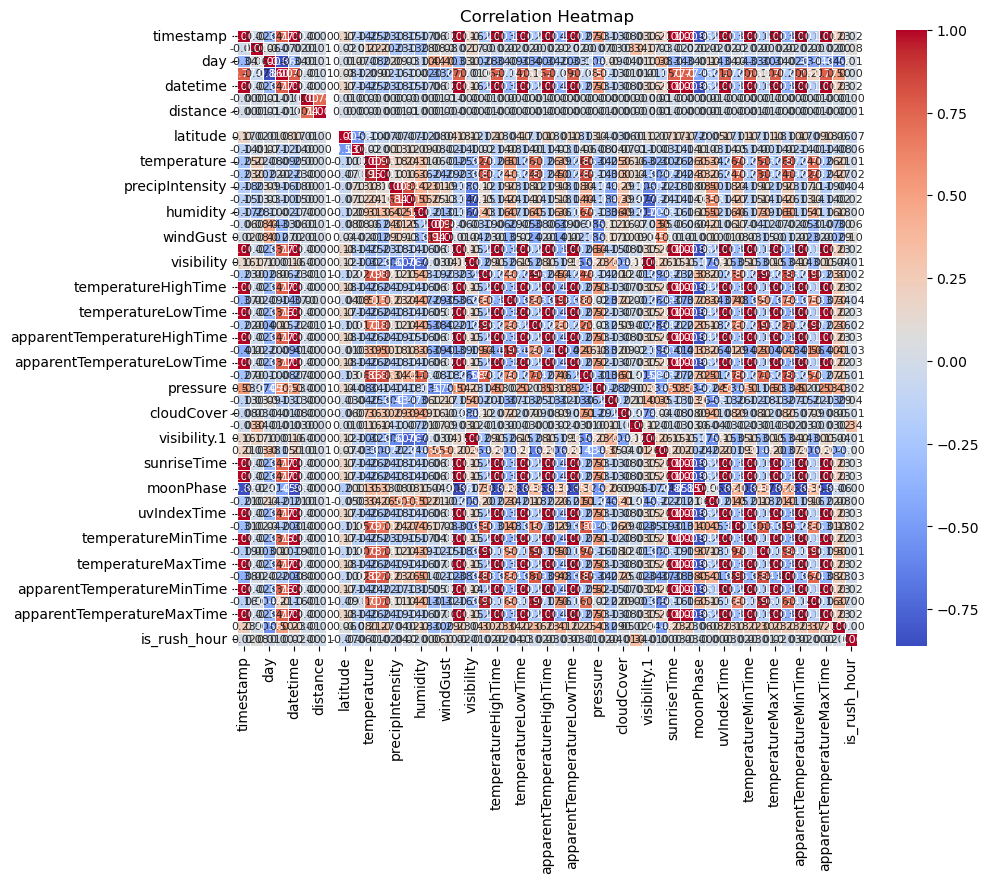

In [122]:
# Calculate correlation matrix
correlation_matrix = numeric_train_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()



In [124]:
def high_correlation_variables(correlation_matrix, threshold=0.7):
    variables = []
    num_variables = correlation_matrix.shape[0]
    
    for i in range(num_variables):
        for j in range(i+1, num_variables):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                variables.append((correlation_matrix.index[i], correlation_matrix.columns[j]))
                
    return variables

high_corr_vars = high_correlation_variables(correlation_matrix, threshold=0.7)

# Print the pairs of variables
print("Pairs of variables with correlation coefficient > 0.7:")
for var1, var2 in high_corr_vars:
    print(f"Variable '{var1}' and Variable '{var2}'")

Pairs of variables with correlation coefficient > 0.7:
Variable 'timestamp' and Variable 'month'
Variable 'timestamp' and Variable 'datetime'
Variable 'timestamp' and Variable 'windGustTime'
Variable 'timestamp' and Variable 'temperatureHighTime'
Variable 'timestamp' and Variable 'temperatureLowTime'
Variable 'timestamp' and Variable 'apparentTemperatureHighTime'
Variable 'timestamp' and Variable 'apparentTemperatureLowTime'
Variable 'timestamp' and Variable 'sunriseTime'
Variable 'timestamp' and Variable 'sunsetTime'
Variable 'timestamp' and Variable 'moonPhase'
Variable 'timestamp' and Variable 'uvIndexTime'
Variable 'timestamp' and Variable 'temperatureMinTime'
Variable 'timestamp' and Variable 'temperatureMaxTime'
Variable 'timestamp' and Variable 'apparentTemperatureMinTime'
Variable 'timestamp' and Variable 'apparentTemperatureMaxTime'
Variable 'day' and Variable 'month'
Variable 'month' and Variable 'datetime'
Variable 'month' and Variable 'windGustTime'
Variable 'month' and Var